Paige Champken y3 NuMod Worksheet 1, 21/11/19.
<br>
3. part a) integrate by parts twice:
<br>
$I=\int e^{-x}sin(x) dx \\ =-e^{-x}sin(x) + \int e^{-x}cos(x) dx \\= -e^{-x}sin(x) - e^{-x}cos(x) - \int e^{-x}sin(x) dx  \\ = -e^{-x}(sin(x)+cos(x)) - I \\ \therefore  I = \frac{-e^{-x}(sin(x)+cos(x))}{2} + c $
<br>
substitute limits:
<br>
$I=\frac{-e^{-2}(sin(2)+cos(2))}{2} + \frac{1}{2} $






In [90]:
import numpy as np

defvalue=((-1)*np.exp(-2)*(np.sin(2)+np.cos(2)))/2 + 0.5
print(defvalue)

0.46662966259317556


Text(0.5, 0, 'x')

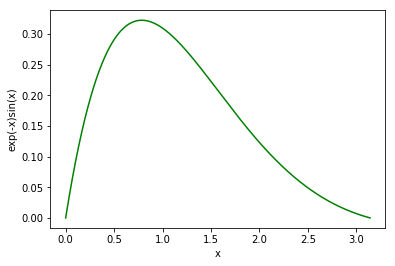

In [91]:
#part b#

import matplotlib.pyplot as plt
%matplotlib inline

def f(x):                     #define function to be plotted#
    f=np.exp(-x)*np.sin(x)
    return f

x=np.linspace(0, np.pi, 1000)  #create array of x values#

plt.plot(x, f(x), 'g')         #plot graph and label axes#
plt.ylabel('exp(-x)sin(x)')
plt.xlabel('x')

In [92]:
#part c#
def trap_int(n):                      #define the integral with input being the number of intervals#
    w=2/n                             #the width of each trapezium is the x range divided by the number of intervals#
    x=np.linspace(0,2,n+1)                  #create array of evenly spaced x values between integration limits, including both limits#
    y=f(x)                                  #create array of y values of all the x points#
    a=(w)*(np.sum(y[1:-1])+y[0]/2+y[-1]/2) #calculate integral according to trapezium rule#
    return a


r=np.arange(1, 11)                    #choose a range of values for n#
int_values=[]                         #create an empty list of integration results#
for val in r:                         #go through the values for n# 
    int_value=(trap_int(val))         #calculating the integral for each n value#
    int_values.append(int_value)      #add to the running list of results#

print(r)
print(int_values)  #i have no idea how to make this into a table#


[ 1  2  3  4  5  6  7  8  9 10]
[0.12306002480577674, 0.37108988805600057, 0.42347446961151913, 0.4422236961884555, 0.4509716042704508, 0.4557417010227341, 0.45862403361946463, 0.46049722618655065, 0.4617825902097551, 0.46270255579806147]


In [93]:
#part d#
#create large range of number of intervals, choosing 9 values spaced logarithmically between 1 and 10^8#
bigr=np.logspace(0, 8, 9, dtype=np.int64, base=10)
relative_errors=[]                                         #create an empty list of errors#
for val in bigr:                                           #go through the chosen range#
    error=(np.abs(defvalue-trap_int(val)))   #see below*#
    relative_errors.append(error)                          #add to running list of errors#


*calculate error on each integration result, making sure that it's the absolute value of the error so that a log can be taken.


Text(0.5, 0, 'log10 of number of intervals')

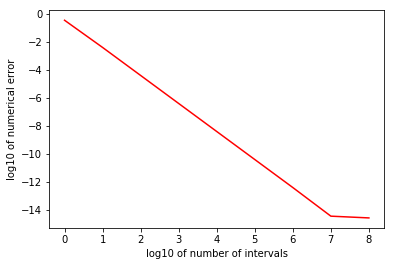

In [94]:
plt.plot(np.log10(bigr), np.log10(relative_errors), 'r')
plt.ylabel('log10 of numerical error')
plt.xlabel('log10 of number of intervals') 

Above is a graph of log10 of the number of intervals against log10 of the error. The error decreases as expected up to $10^{7}$ intervals, but tapers off after that due to the numerical nature of the calculation. 

part e) analytic error on trapezium method:
<br>
$|E| \leq \frac{K(b-a)^3}{12n^2}$ where $|f''(x)|\leq K$  $^{[1]}$
<br>
$|f''(x)| = e^{-x}|sin(x)| $
<br>
So need to find largest value of this function between 0 and 2. Between 0 and 2 $|sin(x)| = sin(x)$ so to find max:

The maximum value of the function between 0 and 2 is 0.32239693986172635


Text(0.5, 0, 'x')

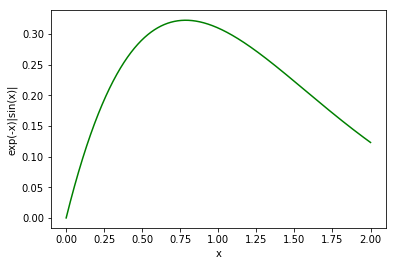

In [95]:
xvalues=np.linspace(0, 2, 10000)         #get loads of values between 0 and 2#
yvalues=f(xvalues)
print('The maximum value of the function between 0 and 2 is', np.amax(yvalues))   #find the maximum of the function#

plt.plot(xvalues, yvalues, 'g')         #having a look at the graph to see if it's consistent#
plt.ylabel('exp(-x)|sin(x)|')
plt.xlabel('x')



With $ K=0.322$ and $(b-a)^3 = 8$, $|E| \leq \frac{0.215}{n^2}$.
<br>
Now to graph the numerical error and the expected analytic error on the same graph to compare.

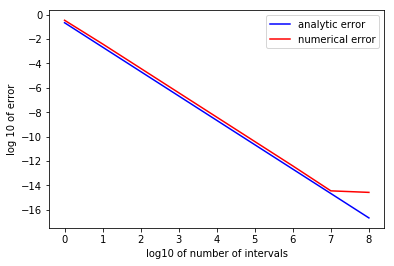

In [96]:
def max_analytic_error(x):   #define the function for maximum anayltic error#
    mac = 0.215/x**2
    return mac

plt.plot(np.log10(bigr), np.log10(max_analytic_error(bigr)), 'b', label='analytic error')
plt.plot(np.log10(bigr), np.log10(relative_errors), 'r', label='numerical error')
plt.ylabel('log 10 of error')
plt.xlabel('log10 of number of intervals')
plt.legend()

The log of the expected analytic error continues to decrease linearly while the numerical error starts to separate. 

In [97]:
#part f#
def round_sig(x, sig):            #define function that returns a number with chosen value of significant figures#
    return round(x, sig-int(np.floor(np.log10(abs(x))))-1)

def simp_int(n, s=17):                      #if no input of chosen sf, round to 17 sf, accuracy of analytical answer#
    if n%2==1:
        raise ValueError("n must be even")  #simpsons rule only works for even number of intervals#
    else:
        x=np.linspace(0,2,n+1)                  #create array of evenly spaced x values between integration limits, including both limits#
        y=f(x)                                  #create array of y values of all the x points#
        a=(2/(3*n))*(2*np.sum(y[::2])-y[0]-y[-1]+4*np.sum(y[1:-1:2])) #calculate integral according to simpsons rule#
        sigfigd_a=round_sig(a, s)      #round to chosen sf#
        return sigfigd_a

print(simp_int(100, 10))  #check rounding and compare to analytically calculated value#



0.4666296609


In [98]:
#part g#
#relative errors on simpson integral#
bigr2=np.logspace(1, 8, 8, dtype=np.int64, base=10) #create new array of logarithmically spaced number of intervals starting at 10 so n is always even#
simp_relative_errors=[]                                         #create an empty list of errors on the integration#
for val in bigr2:                                           #go through the range#
    simperror=np.abs(defvalue-simp_int(val))    #see below*#
    simp_relative_errors.append(simperror)                          #add to running list of errors#


*calculate error on each integration result, making sure that it's the absolute value of the error so that a log can be taken.

Text(0.5, 0, 'log10 of number of intervals')

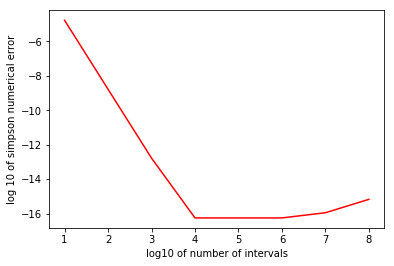

In [99]:
plt.plot(np.log10(bigr2), np.log10(simp_relative_errors), 'r') #plot log10 of number of intervals against log10 of error#
plt.ylabel('log 10 of simpson numerical error')
plt.xlabel('log10 of number of intervals')

Again we see linear decrease in log10 of error against log10 of number of intervals up to the point where the limits of calculating numerically take over. 

Simpsons rule analytic error:
<br>
$|E| \leq \frac{K(b-a)^5}{180n^4}$ where $|f^{(4)}(x)|\leq K$  $^{[1]}$
<br>
$|f^{(4)}(x)| = e^{-x}|sin(x)| $
<br>
So need to find largest value of this function between 0 and 2. Between 0 and 2 $|sin(x)| = sin(x)$ so as calculated above, $ K=0.322$. $(b-a)^5 = 32$ so
<br>
$|E| \leq \frac{0.057}{n^4}$

In [100]:
def simp_max_analytic_error(x):   #define the function for maximum anayltic error#
    y = np.array(x, dtype=np.float)
    smac = 0.057/y**4
    return smac



Now to graph the simpsons rule numerical error and analytic error on the same graph to compare.

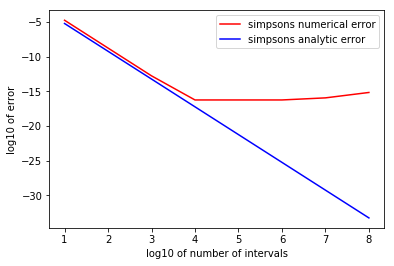

In [101]:
plt.plot(np.log10(bigr2), np.log10(simp_relative_errors), 'r', label='simpsons numerical error')
plt.plot(np.log10(bigr2), np.log10(simp_max_analytic_error(bigr2)), 'b', label='simpsons analytic error')
plt.ylabel('log10 of error')
plt.xlabel('log10 of number of intervals')
plt.legend()



Again the numerical error separates from the analytic error as it gets small enough. This happens at a lower number of intervals than using the trapezium method because the simpsons rule gives a more accurate integration result, resulting in smaller errors and therefore earlier deviation from the expected error due to the limits in precision of numerical calculation. 

In [102]:
#4.#
import scipy.integrate as integrate

func=lambda x:f(x)
integral=integrate.quad(func, 0, 2)
print('The value of the integral is', integral[0], 'and the approximate error is', integral[1])


The value of the integral is 0.46662966259317556 and the approximate error is 5.1806299538401165e-15


The first parameter in integrate.quad is the name of the function, so use a lambda function to name our f(x) and call when integrating.

References: [1] http://math.cmu.edu/~mittal/Recitation_notes.pdf